In [392]:
# Importing libraries
import pandas as pd

In [393]:
# 전처리 불량량 Loading
Defect_df = pd.read_excel('pre_defect_data.xlsx')
# 전처리 투입량 Loading
Input_df = pd.read_excel('pre_input_data.xlsx')
# 전처리 스크랩 Loading
Scrap_df = pd.read_excel('pre_scrap_data.xlsx')

In [394]:
Input_df.head()

,압연년,압연분기,압연월,년월,HEAT_NO,LOT_NO,공정코드,구분,재료코드,공장명,...,STRAND_SEQ,주조완료일,주여구분,지시GR종류,생산GR종류,생산GR공정,제강검사완료일,작업일,강관소재여부,주설비구분
0,2023,1Q,1,202301,S52462,B2C0676502,9Y01,압연,7730,산세,...,6.0,2022-12-04,1,NaN,NaN,NaN,2022-12-05,2023-01-19,N,W
1,2023,1Q,1,202301,S52462,B2C0676501,9Y01,압연,7730,산세,...,10.0,2022-12-04,1,NaN,NaN,NaN,2022-12-05,2023-01-19,N,W
2,2023,1Q,1,202301,S52462,B2C0676409,9Y01,압연,7730,산세,...,8.0,2022-12-04,1,NaN,NaN,NaN,2022-12-05,2023-01-19,N,W
3,2023,1Q,1,202301,S52462,B2C0676408,9Y01,압연,7730,산세,...,8.0,2022-12-04,1,NaN,NaN,NaN,2022-12-05,2023-01-19,N,W
4,2023,1Q,1,202301,S52462,B2C0676407,9Y01,압연,7730,산세,...,9.0,2022-12-04,1,NaN,NaN,NaN,2022-12-05,2023-01-19,N,W


In [395]:
# Convert string column to year-month format
def convert_to_year_month(value):
    if isinstance(value, int):
        year = str(value)[:4]
        month = str(value)[4:]
        return f'{year}-{month.zfill(2)}'
    elif isinstance(value, str):
        year = value[:4]
        month = value[4:]
        return f'{year}-{month.zfill(2)}'
    else:
        return value
    
def convert_to_Rolling_year_month_date(date):
    year = date.year
    month = date.month
    return f'{year}-{month:02}' 

Input_df['년월'] = Input_df['년월'].apply(convert_to_year_month)
Input_df['압연년월'] = Input_df['최종압연일자'].apply(convert_to_Rolling_year_month_date)

Input_df.head()


,압연년,압연분기,압연월,년월,HEAT_NO,LOT_NO,공정코드,구분,재료코드,공장명,...,주조완료일,주여구분,지시GR종류,생산GR종류,생산GR공정,제강검사완료일,작업일,강관소재여부,주설비구분,압연년월
0,2023,1Q,1,2023-01,S52462,B2C0676502,9Y01,압연,7730,산세,...,2022-12-04,1,NaN,NaN,NaN,2022-12-05,2023-01-19,N,W,2023-01
1,2023,1Q,1,2023-01,S52462,B2C0676501,9Y01,압연,7730,산세,...,2022-12-04,1,NaN,NaN,NaN,2022-12-05,2023-01-19,N,W,2023-01
2,2023,1Q,1,2023-01,S52462,B2C0676409,9Y01,압연,7730,산세,...,2022-12-04,1,NaN,NaN,NaN,2022-12-05,2023-01-19,N,W,2023-01
3,2023,1Q,1,2023-01,S52462,B2C0676408,9Y01,압연,7730,산세,...,2022-12-04,1,NaN,NaN,NaN,2022-12-05,2023-01-19,N,W,2023-01
4,2023,1Q,1,2023-01,S52462,B2C0676407,9Y01,압연,7730,산세,...,2022-12-04,1,NaN,NaN,NaN,2022-12-05,2023-01-19,N,W,2023-01


In [396]:
print(Input_df)

        압연년 압연분기  압연월       년월 HEAT_NO      LOT_NO  공정코드  구분  재료코드 공장명  ...  \
0      2023   1Q    1  2023-01  S52462  B2C0676502  9Y01  압연  7730  산세  ...   
1      2023   1Q    1  2023-01  S52462  B2C0676501  9Y01  압연  7730  산세  ...   
2      2023   1Q    1  2023-01  S52462  B2C0676409  9Y01  압연  7730  산세  ...   
3      2023   1Q    1  2023-01  S52462  B2C0676408  9Y01  압연  7730  산세  ...   
4      2023   1Q    1  2023-01  S52462  B2C0676407  9Y01  압연  7730  산세  ...   
...     ...  ...  ...      ...     ...         ...   ...  ..   ...  ..  ...   
84019  2024   2Q    5  2024-05  S57224  B440580002  9Y01  압연  7730  산세  ...   
84020  2024   2Q    5  2024-05  S57224  B440580001  9Y01  압연  7730  산세  ...   
84021  2024   2Q    5  2024-05  S57224  B440580009  9Y01  압연  7730  산세  ...   
84022  2024   2Q    5  2024-05  S57224  B440580008  9Y01  압연  7730  산세  ...   
84023  2024   2Q    5  2024-05  S57224  B440580007  9Y01  압연  7730  산세  ...   

            주조완료일 주여구분 지시GR종류 생산GR종류 생산GR공정     제강검

In [397]:
# Convert 'Roll_Yr_Mth' column to datetime type
Input_df['년월'] = pd.to_datetime(Input_df['년월'])
Input_df['압연년월'] = pd.to_datetime(Input_df['압연년월'])
print(Input_df)

        압연년 압연분기  압연월         년월 HEAT_NO      LOT_NO  공정코드  구분  재료코드 공장명  ...  \
0      2023   1Q    1 2023-01-01  S52462  B2C0676502  9Y01  압연  7730  산세  ...   
1      2023   1Q    1 2023-01-01  S52462  B2C0676501  9Y01  압연  7730  산세  ...   
2      2023   1Q    1 2023-01-01  S52462  B2C0676409  9Y01  압연  7730  산세  ...   
3      2023   1Q    1 2023-01-01  S52462  B2C0676408  9Y01  압연  7730  산세  ...   
4      2023   1Q    1 2023-01-01  S52462  B2C0676407  9Y01  압연  7730  산세  ...   
...     ...  ...  ...        ...     ...         ...   ...  ..   ...  ..  ...   
84019  2024   2Q    5 2024-05-01  S57224  B440580002  9Y01  압연  7730  산세  ...   
84020  2024   2Q    5 2024-05-01  S57224  B440580001  9Y01  압연  7730  산세  ...   
84021  2024   2Q    5 2024-05-01  S57224  B440580009  9Y01  압연  7730  산세  ...   
84022  2024   2Q    5 2024-05-01  S57224  B440580008  9Y01  압연  7730  산세  ...   
84023  2024   2Q    5 2024-05-01  S57224  B440580007  9Y01  압연  7730  산세  ...   

            주조완료일 주여구분 지시GR

In [398]:
Defect_df.head()

,압연년,압연분기,압연월,년월일,업무구분,공장구분,HEAT_NO,LOT_NO,PON,공정순위,...,압연공정4,압연일자4,압연외경4,압연폭4,최종압연공정,최종압연일자,제품압연작업조,생성일시,HCR,투입중량
0,2023,1Q,1,2023-01-07,2,9,S52465,B2C0638202,D23W1W0141,60,...,NaN,NaN,0.0,0,8100,2023-01-04,D,2023-02-02,NaN,NaN
1,2023,1Q,1,2023-01-07,2,9,S52741,B310050902,D23W1W0369,60,...,NaN,NaN,0.0,0,8100,2023-01-06,C,2023-02-02,NaN,NaN
2,2023,1Q,1,2023-01-08,2,9,S52744,B310060208,E23W1W0126,70,...,NaN,NaN,0.0,0,8100,2023-01-06,D,2023-02-02,NaN,NaN
3,2023,1Q,1,2023-01-08,2,9,S52744,B310060208,E23W1W0126,70,...,NaN,NaN,0.0,0,8100,2023-01-06,D,2023-02-02,NaN,NaN
4,2023,1Q,1,2023-01-08,2,9,S52741,B310051009,D23W1W0369,62,...,NaN,NaN,0.0,0,8100,2023-01-06,C,2023-02-02,NaN,NaN


In [399]:
# Extract year and month parts and reformat
def convert_to_year_month_date(date):
    year, month, _ = date.split('-')
    return f'{year}-{month}'

def convert_to_Rolling_year_month_date(date):
    year = date.year
    month = date.month
    return f'{year}-{month:02}' 

Defect_df['년월'] = Defect_df['년월일'].apply(convert_to_year_month_date)
Defect_df['압연년월'] = Defect_df['최종압연일자'].apply(convert_to_Rolling_year_month_date)

# 년월은 년월일 컬럼 앞에 배치
position = Defect_df.columns.get_loc('년월일')
Defect_df.insert(position, '년월', Defect_df.pop('년월'))

Defect_df.head()

,압연년,압연분기,압연월,년월,년월일,업무구분,공장구분,HEAT_NO,LOT_NO,PON,...,압연일자4,압연외경4,압연폭4,최종압연공정,최종압연일자,제품압연작업조,생성일시,HCR,투입중량,압연년월
0,2023,1Q,1,2023-01,2023-01-07,2,9,S52465,B2C0638202,D23W1W0141,...,NaN,0.0,0,8100,2023-01-04,D,2023-02-02,NaN,NaN,2023-01
1,2023,1Q,1,2023-01,2023-01-07,2,9,S52741,B310050902,D23W1W0369,...,NaN,0.0,0,8100,2023-01-06,C,2023-02-02,NaN,NaN,2023-01
2,2023,1Q,1,2023-01,2023-01-08,2,9,S52744,B310060208,E23W1W0126,...,NaN,0.0,0,8100,2023-01-06,D,2023-02-02,NaN,NaN,2023-01
3,2023,1Q,1,2023-01,2023-01-08,2,9,S52744,B310060208,E23W1W0126,...,NaN,0.0,0,8100,2023-01-06,D,2023-02-02,NaN,NaN,2023-01
4,2023,1Q,1,2023-01,2023-01-08,2,9,S52741,B310051009,D23W1W0369,...,NaN,0.0,0,8100,2023-01-06,C,2023-02-02,NaN,NaN,2023-01


In [400]:
# Convert 'Roll_Yr_Mth' column to datetime type
Defect_df['년월'] = pd.to_datetime(Defect_df['년월'])
Defect_df['압연년월'] = pd.to_datetime(Defect_df['압연년월'])

print(Defect_df)

       압연년 압연분기  압연월         년월         년월일  업무구분 공장구분 HEAT_NO      LOT_NO  \
0     2023   1Q    1 2023-01-01  2023-01-07     2    9  S52465  B2C0638202   
1     2023   1Q    1 2023-01-01  2023-01-07     2    9  S52741  B310050902   
2     2023   1Q    1 2023-01-01  2023-01-08     2    9  S52744  B310060208   
3     2023   1Q    1 2023-01-01  2023-01-08     2    9  S52744  B310060208   
4     2023   1Q    1 2023-01-01  2023-01-08     2    9  S52741  B310051009   
...    ...  ...  ...        ...         ...   ...  ...     ...         ...   
5325  2024   1Q    2 2024-05-01  2024-05-05     2    9  S56533  B420250007   
5326  2024   2Q    4 2024-05-01  2024-05-05     2    9  S57234  B440276602   
5327  2024   2Q    4 2024-05-01  2024-05-05     2    9  S55806  B3A0481701   
5328  2024   2Q    5 2024-05-01  2024-05-07     2    9  S57541  B450017302   
5329  2024   2Q    5 2024-05-01  2024-05-07     2    9  S57541  B450017302   

             PON  ...  압연일자4 압연외경4 압연폭4 최종압연공정     최종압연일자 제품압연작

In [401]:
# Extract year and month parts and reformat
def convert_to_year_month_date(date):
    year, month, _ = date.split('-')
    return f'{year}-{month}'

def convert_to_Rolling_year_month_date(date):
    year = date.year
    month = date.month
    return f'{year}-{month:02}' 

Scrap_df['년월'] = Scrap_df['년월일'].apply(convert_to_year_month_date)
Scrap_df['압연년월'] = Scrap_df['최종압연일자'].apply(convert_to_Rolling_year_month_date)

# 년월은 년월일 컬럼 앞에 배치
position = Scrap_df.columns.get_loc('년월일')
Scrap_df.insert(position, '년월', Scrap_df.pop('년월'))

#불량과 폐기의 컬럼명이 동일하여 컬럼명 변경
Scrap_df.rename(columns={'발생수량':'폐기수량'}, inplace=True)
Scrap_df.rename(columns={'발생중량':'폐기중량'}, inplace=True)

Scrap_df.head()

,압연년,압연분기,압연월,년월,년월일,업무구분,공장구분,HEAT_NO,LOT_NO,PON,...,압연일자4,압연외경4,압연폭4,최종압연공정,최종압연일자,제품압연작업조,생성일시,HCR,투입중량,압연년월
0,2023,1Q,1,2023-01,2023-01-07,2,9,S52465,B2C0638202,D23W1W0141,...,NaN,0.0,0,8100,2023-01-04,D,2023-02-02,NaN,NaN,2023-01
1,2023,1Q,1,2023-01,2023-01-07,2,9,S52741,B310050902,D23W1W0369,...,NaN,0.0,0,8100,2023-01-06,C,2023-02-02,NaN,NaN,2023-01
2,2023,1Q,1,2023-01,2023-01-08,2,9,S52741,B310051009,D23W1W0369,...,NaN,0.0,0,8100,2023-01-06,C,2023-02-02,NaN,NaN,2023-01
3,2023,1Q,1,2023-01,2023-01-08,2,9,S52741,B310051009,D23W1W0369,...,NaN,0.0,0,8100,2023-01-06,C,2023-02-02,NaN,NaN,2023-01
4,2023,1Q,1,2023-01,2023-01-09,2,9,S51768,B2A0672205,D23W1W0252,...,NaN,0.0,0,8100,2023-01-04,D,2023-02-02,NaN,NaN,2023-01


In [402]:
# Convert 'Roll_Yr_Mth' column to datetime type for Scrap_df
Scrap_df['년월'] = pd.to_datetime(Scrap_df['년월'])
Scrap_df['압연년월'] = pd.to_datetime(Scrap_df['압연년월'])

print(Scrap_df)


       압연년 압연분기  압연월         년월         년월일  업무구분  공장구분 HEAT_NO      LOT_NO  \
0     2023   1Q    1 2023-01-01  2023-01-07     2     9  S52465  B2C0638202   
1     2023   1Q    1 2023-01-01  2023-01-07     2     9  S52741  B310050902   
2     2023   1Q    1 2023-01-01  2023-01-08     2     9  S52741  B310051009   
3     2023   1Q    1 2023-01-01  2023-01-08     2     9  S52741  B310051009   
4     2023   1Q    1 2023-01-01  2023-01-09     2     9  S51768  B2A0672205   
...    ...  ...  ...        ...         ...   ...   ...     ...         ...   
2459  2024   2Q    4 2024-05-01  2024-05-04     2     9  S57244  B440124615   
2460  2024   2Q    4 2024-05-01  2024-05-04     2     9  S57243  B440106833   
2461  2024   1Q    3 2024-05-01  2024-05-04     2     9  S56893  B430098403   
2462  2024   2Q    4 2024-05-01  2024-05-04     2     9  S57243  B440106832   
2463  2024   1Q    2 2024-05-01  2024-05-05     2     9  S56533  B420250007   

             PON  ...  압연일자4 압연외경4 압연폭4 최종압연공정     

In [403]:
# # 기간 설정(년월)
# start_date = pd.to_datetime('2023-01')  # None for no filter,or # '2023-01'
# end_date = pd.to_datetime('2024-04')    # None for no filter,or # '2023-09'

# # 기간 설정의 범위 결정
# if start_date is None or end_date is None:
#     min_date = min(Input_df['년월'].min(), Defect_df['년월'].min())
#     max_date = max(Input_df['년월'].max(), Defect_df['년월'].max())
#     if start_date is None:
#         start_date = min_date
#     if end_date is None:
#         end_date = max_date

# # 기간 필터 적용
# Input_df = Input_df[(Input_df['년월'] >= start_date) & (Input_df['년월'] <= end_date)]
# Defect_df = Defect_df[(Defect_df['년월'] >= start_date) & (Defect_df['년월'] <= end_date)]
# Scrap_df = Scrap_df[(Scrap_df['년월'] >= start_date) & (Scrap_df['년월'] <= end_date)]


# # 여러 개의 필터 조건 설정
# steel_grade_filters = [] #'316LDS1','316LDSB','STS304HCS5','STS304SX'
# out_dia_filters =[]
# defects_filters =[] #'SEAM','SEAM+터짐', 'SEAM+종크랙','터짐','종크랙'


# # 필터링 조건 생성(1)- apply_filters
# def apply_filters(dataframe):
#     if steel_grade_filters:
#         grade_condition = dataframe['사내강종명'].isin(steel_grade_filters)
#     else:
#         grade_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

#     if out_dia_filters:
#         dia_condition = dataframe['외경'].isin(out_dia_filters)
#     else:
#         dia_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정
    
#     return grade_condition & dia_condition 

# # 필터링 조건 생성(2) - apply_filters_2
# def apply_filters_2(dataframe):
#     if steel_grade_filters:
#         grade_condition = dataframe['사내강종명'].isin(steel_grade_filters)
#     else:
#         grade_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

#     if out_dia_filters:
#         dia_condition = dataframe['외경'].isin(out_dia_filters)
#     else:
#         dia_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

#     if defects_filters:
#         defects_condition = dataframe['이상코드명'].isin(defects_filters)
#     else:
#         defects_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정
    
#     return grade_condition & dia_condition & defects_condition

# # 필터링된 결과 출력(덮어쓰기 했음!)
# Input_df = Input_df[apply_filters(Input_df)]
# Defect_df = Defect_df[apply_filters_2(Defect_df)]
# Scrap_df = Scrap_df[apply_filters_2(Scrap_df)]

# # Group by year and month, sum the '투입중량' and '발생중량'
# grouped_input = Input_df.groupby(Input_df['년월'].dt.to_period('M'))['투입중량'].sum().reset_index()
# grouped_defect = Defect_df.groupby(Defect_df['년월'].dt.to_period('M'))['발생중량'].sum().reset_index()
# grouped_scrap = Scrap_df.groupby(Scrap_df['년월'].dt.to_period('M'))['폐기중량'].sum().reset_index()

# # Merge input and defect data on '년월'
# merged_df = pd.merge(grouped_input, grouped_defect, on='년월', how='left')
# merged_df = pd.merge(merged_df, grouped_scrap, on='년월', how='left')

# # Fill missing defect values with 0
# merged_df['발생중량'] = merged_df['발생중량'].fillna(0)
# merged_df['폐기중량'] = merged_df['폐기중량'].fillna(0)

# # Calculate defect rate
# merged_df['불량율'] = (merged_df['발생중량'] / merged_df['투입중량']) * 100
# merged_df['폐기율'] = (merged_df['폐기중량'] / merged_df['투입중량']) * 100

# #merged_df.head()
# # Create a new column '년-월' with formatted year and month
# merged_df['년월'] = merged_df['년월'].dt.year.astype(str) + '-' + merged_df['년월'].dt.month.astype(str)

# # Print the merged DataFrame with defect rate
# #print(merged_df)

In [404]:
# merged_df


In [405]:
# #투입중량, 발생중량을 톤으로 변경
# merged_df['투입중량'] = merged_df['투입중량'] / 1000
# merged_df['발생중량'] = merged_df['발생중량'] / 1000
# merged_df['폐기중량'] = merged_df['폐기중량'] / 1000


# merged_df

In [406]:
# 기간 설정(압연년월)
start_date = pd.to_datetime('2023-01')  # None for no filter,or # '2023-01'
end_date = pd.to_datetime('2024-05')    # None for no filter,or # '2023-09'

# 기간 설정의 범위 결정
if start_date is None or end_date is None:
    min_date = min(Input_df['압연년월'].min(), Defect_df['압연년월'].min())
    max_date = max(Input_df['압연년월'].max(), Defect_df['압연년월'].max())
    if start_date is None:
        start_date = min_date
    if end_date is None:
        end_date = max_date

# 기간 필터 적용
Input_df = Input_df[(Input_df['압연년월'] >= start_date) & (Input_df['압연년월'] <= end_date)]
Defect_df = Defect_df[(Defect_df['압연년월'] >= start_date) & (Defect_df['압연년월'] <= end_date)]
Scrap_df = Scrap_df[(Scrap_df['압연년월'] >= start_date) & (Scrap_df['압연년월'] <= end_date)]


# 여러 개의 필터 조건 설정
steel_grade_filters = ['STS430FS2','STS430FS3','STS430FS6','STS430FS7','STS430FS8'] #'316LDS1','316LDSB','STS304HCS5','STS304SX'
out_dia_filters =[]
defects_filters =['SEAM','SEAM+터짐', 'SEAM+종크랙','터짐','종크랙','SCAB','줄파임'] #'SEAM','SEAM+터짐', 'SEAM+종크랙','터짐','종크랙'


# 필터링 조건 생성(1)- apply_filters
def apply_filters(dataframe):
    if steel_grade_filters:
        grade_condition = dataframe['사내강종명'].isin(steel_grade_filters)
    else:
        grade_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

    if out_dia_filters:
        dia_condition = dataframe['외경'].isin(out_dia_filters)
    else:
        dia_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정
    
    return grade_condition & dia_condition 

# 필터링 조건 생성(2) - apply_filters_2
def apply_filters_2(dataframe):
    if steel_grade_filters:
        grade_condition = dataframe['사내강종명'].isin(steel_grade_filters)
    else:
        grade_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

    if out_dia_filters:
        dia_condition = dataframe['외경'].isin(out_dia_filters)
    else:
        dia_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

    if defects_filters:
        defects_condition = dataframe['이상코드명'].isin(defects_filters)
    else:
        defects_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정
    
    return grade_condition & dia_condition & defects_condition

# 필터링된 결과 출력(덮어쓰기 했음!)
Input_df = Input_df[apply_filters(Input_df)]
Defect_df = Defect_df[apply_filters_2(Defect_df)]
Scrap_df = Scrap_df[apply_filters_2(Scrap_df)]

# Group by year and month, sum the '투입중량' and '발생중량'
grouped_input = Input_df.groupby(Input_df['압연년월'].dt.to_period('M'))['투입중량'].sum().reset_index()
grouped_defect = Defect_df.groupby(Defect_df['압연년월'].dt.to_period('M'))['발생중량'].sum().reset_index()
grouped_scrap = Scrap_df.groupby(Scrap_df['압연년월'].dt.to_period('M'))['폐기중량'].sum().reset_index()

# Merge input and defect data on '압연년월'
merged_df = pd.merge(grouped_input, grouped_defect, on='압연년월', how='left')
merged_df = pd.merge(merged_df, grouped_scrap, on='압연년월', how='left')

# Fill missing defect values with 0
merged_df['발생중량'] = merged_df['발생중량'].fillna(0)
merged_df['폐기중량'] = merged_df['폐기중량'].fillna(0)

# Calculate defect rate
merged_df['불량율'] = (merged_df['발생중량'] / merged_df['투입중량']) * 100
merged_df['폐기율'] = (merged_df['폐기중량'] / merged_df['투입중량']) * 100

#merged_df.head()
# Create a new column '년-월' with formatted year and month
merged_df['압연년월'] = merged_df['압연년월'].dt.year.astype(str) + '-' + merged_df['압연년월'].dt.month.astype(str)

# Print the merged DataFrame with defect rate
#print(merged_df)

In [407]:
merged_df

,압연년월,투입중량,발생중량,폐기중량,불량율,폐기율
0,2023-1,210400,18542,2092,8.812738,0.994297
1,2023-2,125231,11776,3094,9.403422,2.470634
2,2023-3,343399,4689,500,1.365467,0.145603
3,2023-4,199616,22452,12595,11.247595,6.309614
4,2023-5,250402,21974,10311,8.775489,4.117779
5,2023-6,281471,18982,980,6.743856,0.348171
6,2023-7,363824,16657,2823,4.578313,0.775925
7,2023-8,374210,6788,2934,1.813955,0.784052
8,2023-9,261947,19230,2088,7.341180,0.797108
9,2023-10,130901,13103,6198,10.009855,4.734876


In [408]:
#투입중량, 발생중량을 톤으로 변경
merged_df['투입중량'] = merged_df['투입중량'] / 1000
merged_df['발생중량'] = merged_df['발생중량'] / 1000
merged_df['폐기중량'] = merged_df['폐기중량'] / 1000


merged_df

,압연년월,투입중량,발생중량,폐기중량,불량율,폐기율
0,2023-1,210.400,18.542,2.092,8.812738,0.994297
1,2023-2,125.231,11.776,3.094,9.403422,2.470634
2,2023-3,343.399,4.689,0.500,1.365467,0.145603
3,2023-4,199.616,22.452,12.595,11.247595,6.309614
4,2023-5,250.402,21.974,10.311,8.775489,4.117779
5,2023-6,281.471,18.982,0.980,6.743856,0.348171
6,2023-7,363.824,16.657,2.823,4.578313,0.775925
7,2023-8,374.210,6.788,2.934,1.813955,0.784052
8,2023-9,261.947,19.230,2.088,7.341180,0.797108
9,2023-10,130.901,13.103,6.198,10.009855,4.734876


In [409]:
#소숫점 자리수 변경
merged_df[['투입중량','발생중량','폐기중량']] = merged_df[['투입중량','발생중량','폐기중량']].round(1)
merged_df[['불량율','폐기율']] = merged_df[['불량율','폐기율']].round(2)

merged_df

,압연년월,투입중량,발생중량,폐기중량,불량율,폐기율
0,2023-1,210.4,18.5,2.1,8.81,0.99
1,2023-2,125.2,11.8,3.1,9.40,2.47
2,2023-3,343.4,4.7,0.5,1.37,0.15
3,2023-4,199.6,22.5,12.6,11.25,6.31
4,2023-5,250.4,22.0,10.3,8.78,4.12
5,2023-6,281.5,19.0,1.0,6.74,0.35
6,2023-7,363.8,16.7,2.8,4.58,0.78
7,2023-8,374.2,6.8,2.9,1.81,0.78
8,2023-9,261.9,19.2,2.1,7.34,0.80
9,2023-10,130.9,13.1,6.2,10.01,4.73


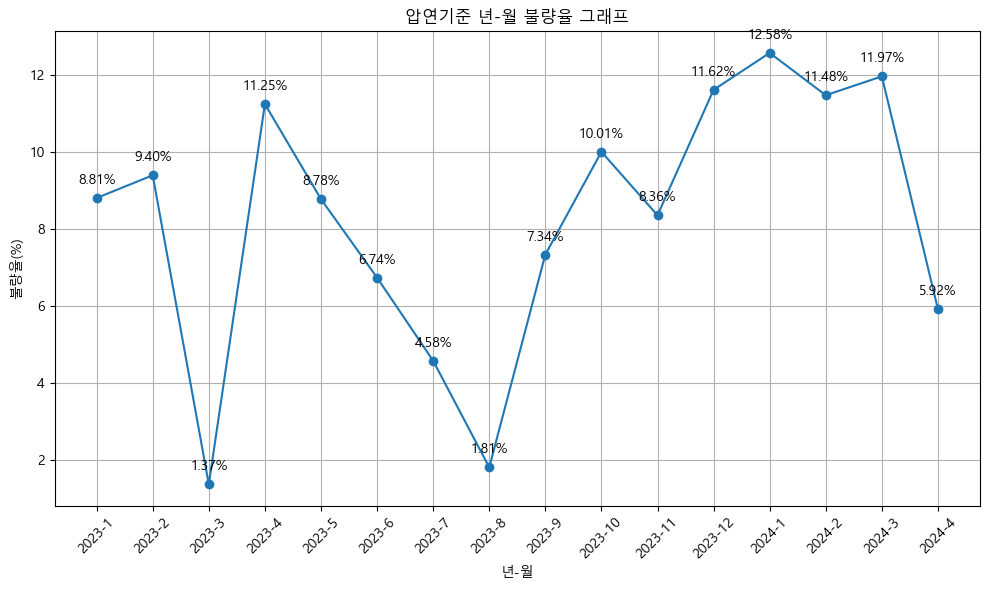

In [410]:
# 불량율 그래프(1)-압연일 기준
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# Plot the defect rate line chart
plt.figure(figsize=(10, 6))
plt.plot(merged_df['압연년월'], merged_df['불량율'], marker='o')
plt.xlabel('년-월')
plt.ylabel('불량율(%)')
plt.title('압연기준 년-월 불량율 그래프')
plt.xticks(rotation=45)
plt.grid(True)

# Annotate each point with the defect rate
for i, row in merged_df.iterrows():
    plt.annotate(f'{row["불량율"]:.2f}%', (row['압연년월'], row['불량율']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()

# Show the plot
plt.show()